In [10]:
import pandas as pd
#数据集从6月到12月
#1.6-11月作为训练集
data = pd.read_csv("/data/fjsdata/ctKngBase/201706.csv", sep=',', low_memory=False,encoding = 'gb18030')
print ('Dataset shape of month 6 is:%d rows and %d columns'%(data.shape[0],data.shape[1]))
data_training=data
data = pd.read_csv("/data/fjsdata/ctKngBase/201707.csv", sep=',', low_memory=False,encoding = 'gb18030')
print ('Dataset shape of month 7 is:%d rows and %d columns'%(data.shape[0],data.shape[1]))
data_training=pd.concat([data_training, data], axis=0)
data = pd.read_csv("/data/fjsdata/ctKngBase/201708.csv", sep=',', low_memory=False,encoding = 'gb18030')
print ('Dataset shape of month 8 is:%d rows and %d columns'%(data.shape[0],data.shape[1]))
data_training=pd.concat([data_training, data], axis=0)
data = pd.read_csv("/data/fjsdata/ctKngBase/201709.csv", sep=',', low_memory=False,encoding = 'gb18030')
print ('Dataset shape of month 9 is:%d rows and %d columns'%(data.shape[0],data.shape[1]))
data_training=pd.concat([data_training, data], axis=0)
data = pd.read_csv("/data/fjsdata/ctKngBase/201710.csv", sep=',', low_memory=False,encoding = 'gb18030')
print ('Dataset shape of month 10 is:%d rows and %d columns'%(data.shape[0],data.shape[1]))
data_training=pd.concat([data_training, data], axis=0)
data = pd.read_csv("/data/fjsdata/ctKngBase/201711.csv", sep=',', low_memory=False,encoding = 'gb18030')
print ('Dataset shape of month 11 is:%d rows and %d columns'%(data.shape[0],data.shape[1]))
data_training=pd.concat([data_training, data], axis=0)
data_training = data_training[['STAFF_CODE','KNLG_ID','VISIT_TIME','CITY_NAME']]
print ('Dataset shape of training data is:%d rows and %d columns'%(data_training.shape[0],data_training.shape[1]))
data_training.to_csv("/data/fjsdata/ctKngBase/traindata.csv",index=False,sep='|')
#2.12月作为测试集
data = pd.read_csv("/data/fjsdata/ctKngBase/201712.csv", sep=',', low_memory=False,encoding = 'gb18030')
print ('Dataset shape of month 12 is:%d rows and %d columns'%(data.shape[0],data.shape[1]))
data_testing=data
data_testing = data_testing[['STAFF_CODE','KNLG_ID','VISIT_TIME','CITY_NAME']]
print ('Dataset shape of testing data is:%d rows and %d columns'%(data_testing.shape[0],data_testing.shape[1]))
data_testing.to_csv("/data/fjsdata/ctKngBase/testdata.csv",index=False,sep='|')

Dataset shape of month 6 is:1893595 rows and 9 columns
Dataset shape of month 7 is:1933870 rows and 9 columns
Dataset shape of month 8 is:2076182 rows and 9 columns
Dataset shape of month 9 is:2051092 rows and 9 columns
Dataset shape of month 10 is:1881882 rows and 9 columns
Dataset shape of month 11 is:2223703 rows and 9 columns
Dataset shape of training data is:12060324 rows and 4 columns
Dataset shape of month 12 is:2116578 rows and 9 columns
Dataset shape of testing data is:2116578 rows and 4 columns


In [6]:
#统计CSR对KE的行为次数
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

traindata = pd.read_csv("/data/fjsdata/ctKngBase/traindata.csv", sep='|', low_memory=False)
testdata = pd.read_csv("/data/fjsdata/ctKngBase/testdata.csv", sep='|', low_memory=False)
data = pd.concat([traindata,testdata],axis=0)#合并
data=data[['STAFF_CODE','KNLG_ID']]
le = LabelEncoder()
data = data.apply(le.fit_transform)#将csr和ke全部标准编号
dict_num={}
for csr,ke in  np.array(data).tolist():
    dict_num.setdefault(csr,{})
    dict_num[csr].setdefault(ke,0)
    dict_num[csr][ke] += 1
list_num=[]
for csr,v in dict_num.items():
    for ke,num in v.items():
        list_num.append([csr,ke,num])
#df=pd.DataFrame(dict_num.items(), columns=['csr', 'ke','num'])#dict转化为 dataframe
df=pd.DataFrame(list_num, columns=['csr', 'ke','num'])#list转换成 dataframe
df.to_csv('/data/fjsdata/ctKngBase/kb.csv', index=False, sep='|')

In [1]:
#训练数据
import pandas as pd
kbdata = traindata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
nCSR = len(kbdata['csr'].unique())
nKE =len(kbdata['ke'].unique())
print (nCSR)
print (nKE)
print(kbdata.shape)
print(kbdata.head())

10216
96324
(2552924, 3)
    csr     ke  num
0  2986  42211    1
1  2986  28115    2
2  2986  29249    8
3  2986  75667    1
4  2986  74903    1


In [4]:
"""
This module illustrates how to compute Precision at k and Recall at k metrics.
"""
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from collections import defaultdict

from surprise import Dataset
from surprise import SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


data = Dataset.load_builtin('ml-100k')
kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.8801950354609929
0.25496521196479766
0.8677990092002827
0.2617294888727511
0.8772004241781542
0.24437264334110564
0.8806794055201697
0.2582745394296718
0.8688452001416932
0.2672588712873156


In [5]:
#MovieLens数据集
import scipy.sparse as sp
import numpy as np

#1.数据集
#测试正样本
def load_rating_file_as_list(filename):
    ratingList = []
    with open(filename, "r") as f:
        line = f.readline()
        while line != None and line != "":
            arr = line.split("\t")
            user, item = int(arr[0]), int(arr[1])
            ratingList.append([user, item])
            line = f.readline()
    return ratingList
#测试负样本
def load_negative_file(filename):
    negativeList = []
    with open(filename, "r") as f:
        line = f.readline()
        while line != None and line != "":
            arr = line.split("\t")
            negatives = []
            for x in arr[1: ]:
                negatives.append(int(x))
            negativeList.append(negatives)
            line = f.readline()
    return negativeList
#训练矩阵
def load_rating_file_as_matrix(filename):
    #Read .rating file and Return dok matrix.
    #The first line of .rating file is: num_users\t num_items
    # Get number of users and items
    num_users, num_items = 0, 0
    with open(filename, "r") as f:
        line = f.readline()
        while line != None and line != "":
            arr = line.split("\t")
            u, i = int(arr[0]), int(arr[1])
            num_users = max(num_users, u)
            num_items = max(num_items, i)
            line = f.readline()
    # Construct matrix
    mat = sp.dok_matrix((num_users+1, num_items+1), dtype=np.float32)
    with open(filename, "r") as f:
        line = f.readline()
        while line != None and line != "":
            arr = line.split("\t")
            user, item, rating = int(arr[0]), int(arr[1]), float(arr[2])
            if (rating > 0):
                mat[user, item] = 1.0
            line = f.readline()    
    return mat
trainMatrix = load_rating_file_as_matrix("/data/fjsdata/ctKngBase/ml/ml-1m.train.rating")
testRatings = load_rating_file_as_list("/data/fjsdata/ctKngBase/ml/ml-1m.test.rating")
testNegatives = load_negative_file("/data/fjsdata/ctKngBase/ml/ml-1m.test.negative")
#2.模型
print (len(testRatings))
print (len(testNegatives))

6040
6040


In [3]:
#Dataset Handling
import surprise as sp
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#1.Loading the dataset and Excluding the outliers
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
#seven month multiply thirty days per month is equal to 210,and one time per day multiply 210 is 210.
kbdata = kbdata.loc[(kbdata['num']<200)]
print ('Dataset shape is:%d rows and %d columns'%(kbdata.shape[0],kbdata.shape[1]))

'''
dict_csr={}
for csr,ke,num in  np.array(kbdata).tolist():
    dict_csr.setdefault(csr,{})
    dict_csr[csr].setdefault(ke,0)
    dict_csr[csr][ke] = num
list_train=[]
list_test=[]
for csr in dict_csr:
    list_csr=[]
    for ke in dict_csr[csr]:
        num=dict_csr[csr][ke]
        list_csr.append([csr,ke,num])
    list_test_csr=list_csr[::10]#Getting one per ten
    list_train_csr = [x for x in list_csr if x not in list_test]
    list_test.extend(list_test_csr)
    list_train.extend(list_train_csr)

list_train=[]
list_test=[]
list_ke = np.array(kbdata['ke']).tolist()
for csr in np.array(kbdata['csr']).tolist():
    csrArr = kbdata[kbdata['csr']==csr]
    train, test = train_test_split(csrArr, test_size=0.1)
    list_train.extend(np.array(train).tolist())
    list_test.extend(np.array(test).tolist())#pos
    list_ke_csr = np.array(csrArr['ke']).tolist()
    list_ke_csr_neg = [x for x in list_ke if x not in list_ke_csr]
    list_ke_csr_neg = random.sample(list_ke_csr_neg, min(test.shape[0]*10,30))#pos:neg=1:10,at least 30
    for ke in list_ke_csr_neg:
        list_test.append([csr,ke,0])#neg
'''
#2.generating the trainset.
trainset, testset = train_test_split(kbdata, test_size=0.1)
trainset.to_csv('/data/fjsdata/ctKngBase/trainset.csv', index=False, sep='|')
print ('Trainset shape is:%d rows and %d columns'%(trainset.shape[0],trainset.shape[1]))

#3.generating the testset.
list_ke = np.array(kbdata['ke']).tolist() #get all items
list_ke =  list(set(list_ke)) #drop duplicate
list_csr = np.array(testset['csr']).tolist()
dict_test ={}
for csr,ke,num in  np.array(testset).tolist():
    dict_test.setdefault(csr,{})
    dict_test[csr].setdefault(ke,0)
    dict_test[csr][ke] = num
for csr in list_csr:
    list_ke_csr = [x for x in random.sample(list_ke,50) if x not in dict_test[csr]]
    dict_test.setdefault(csr,{})
    dict_test[csr].setdefault(ke,0)#negtive sample
list_test=[]
for csr,v in dict_test.items():
    for ke,num in v.items():
        list_test.append([csr,ke,num])
testset=pd.DataFrame(list_test, columns=['csr', 'ke','num'])#list转换成 dataframe
testset.to_csv('/data/fjsdata/ctKngBase/testset.csv', index=False, sep='|')
print ('Testset shape is:%d rows and %d columns'%(testset.shape[0],testset.shape[1]))

Dataset shape is:2547452 rows and 3 columns
Trainset shape is:2292706 rows and 3 columns
Testset shape is:263708 rows and 3 columns


In [2]:
#Dataset Handling
import surprise as sp
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#1.Loading the dataset and Excluding the outliers
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
#seven month multiply thirty days per month is equal to 210,and one time per day multiply 210 is 210.
kbdata = kbdata.loc[(kbdata['num']<200)]
print ('Dataset shape is:%d rows and %d columns'%(kbdata.shape[0],kbdata.shape[1]))

trainset, testset = train_test_split(kbdata, test_size=0.1)
#2.generating the trainset and testset
trainset.to_csv('/data/fjsdata/ctKngBase/trainset.csv', index=False, sep='|')
print ('Trainset shape is:%d rows and %d columns'%(trainset.shape[0],trainset.shape[1]))
'''
#3.generating the testset.
list_ke = np.array(trainset['ke']).tolist() #get all items
list_ke =  list(set(list_ke)) #drop duplicate
list_csr = np.array(testset['csr']).tolist()
list_csr = list(set(list_csr))
list_test =np.array(testset).tolist()
for csr in list_csr:
    csr_ke = testset[testset['csr']==csr]
    for ke in random.sample(list_ke,30):
        if ke not in np.array(csr_ke['ke'].tolist()):
            list_test.append([csr,ke,0])
testset=pd.DataFrame(list_test, columns=['csr', 'ke','num'])#list转换成 dataframe
'''
testset.to_csv('/data/fjsdata/ctKngBase/testset.csv', index=False, sep='|')
print ('Testset shape is:%d rows and %d columns'%(testset.shape[0],testset.shape[1]))

Dataset shape is:2547452 rows and 3 columns
Trainset shape is:2292706 rows and 3 columns
Testset shape is:254746 rows and 3 columns


In [3]:
#Dataset Handling
import surprise as sp
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#1.Loading the dataset and Excluding the outliers
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
#seven month multiply thirty days per month is equal to 210,and one time per day multiply 210 is 210.
kbdata = kbdata.loc[(kbdata['num']<200)]
print ('Dataset shape is:%d rows and %d columns'%(kbdata.shape[0],kbdata.shape[1]))

NUM_USERS = kbdata['csr'].max() + 1
NUM_ITEMS = kbdata['ke'].max() + 1
print (NUM_USERS)
print (NUM_ITEMS)
print (NUM_USERS*NUM_ITEMS)
print('dataset density:{:f}'.format(len(kbdata)*1.0/(NUM_USERS*NUM_ITEMS)))

Dataset shape is:2547452 rows and 3 columns
10216
96324
984045984
dataset density:0.002589


Dataset shape is:2547452 rows and 3 columns
32.85684754521964


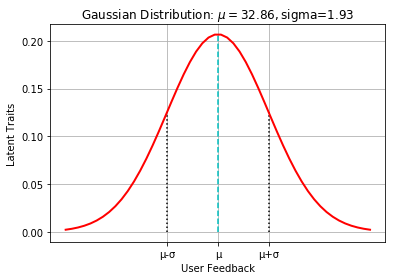

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#正态分布的概率密度函数。可以理解成 x 是 mu（均值）和 sigma（标准差）的函数
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

#1.Loading the dataset and Excluding the outliers
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
#seven month multiply thirty days per month is equal to 210,and one time per day multiply 210 is 210.
kbdata = kbdata.loc[(kbdata['num']<200)]
print ('Dataset shape is:%d rows and %d columns'%(kbdata.shape[0],kbdata.shape[1]))

csr2986= kbdata[kbdata['csr']==2986]
sigma = csr2986['num'].mean()
#ke28115 = kbdata[kbdata['ke']==28115]
ke26677 = kbdata[kbdata['ke']==26677]
mu = ke26677['num'].mean()
print (mu)
#print (ke26677['num'].value_counts())

# Python实现正态分布
# 绘制正态分布概率密度函数
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
y_sig = np.exp(-(x - mu) ** 2 /(2* sigma **2))/(math.sqrt(2*math.pi)*sigma)
plt.plot(x, y_sig, "r-", linewidth=2)
plt.vlines(mu, 0, np.exp(-(mu - mu) ** 2 /(2* sigma **2))/(math.sqrt(2*math.pi)*sigma), colors = "c", linestyles = "dashed")
plt.vlines(mu+sigma, 0, np.exp(-(mu+sigma - mu) ** 2 /(2* sigma **2))/(math.sqrt(2*math.pi)*sigma), colors = "k", linestyles = "dotted")
plt.vlines(mu-sigma, 0, np.exp(-(mu-sigma - mu) ** 2 /(2* sigma **2))/(math.sqrt(2*math.pi)*sigma), colors = "k", linestyles = "dotted")
plt.xticks ([mu-sigma,mu,mu+sigma],['μ-σ','μ','μ+σ'])
plt.xlabel('User Feedback')
plt.ylabel('Latent Traits')
plt.title('Gaussian Distribution: $\mu = %.2f, $sigma=%.2f'%(mu,sigma))
plt.grid(True)
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#1.Loading the dataset and Excluding the outliers
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
#seven month multiply thirty days per month is equal to 210,and one time per day multiply 210 is 210.
kbdata = kbdata.loc[(kbdata['num']<200)]
print ('Dataset shape is:%d rows and %d columns'%(kbdata.shape[0],kbdata.shape[1]))

mu = kbdata['num'].mean()
print (mu)
maxv = kbdata['num'].max()
minv = kbdata['num'].min()
print (maxv)
print (minv)

Dataset shape is:2547452 rows and 3 columns
4.827711768465117
199
1


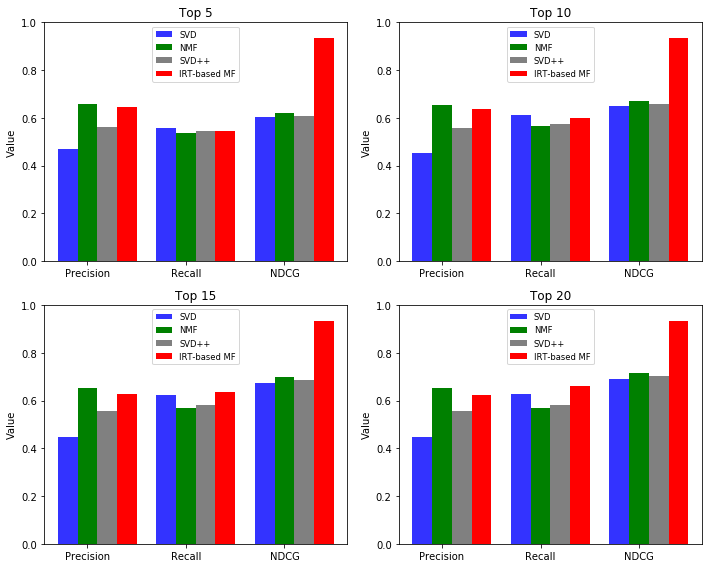

In [2]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(10,8))
for i in range(4): 
    if i==0:
        plt.subplot(2,2,i+1)#2行2列
        label_list = ['Precision', 'Recall', 'NDCG']    # 横坐标刻度显示值
        num_list1 = [0.47032433, 0.55948026, 0.60567746]      # SVD
        num_list2 = [0.65832681, 0.5388143, 0.62009335]      # NMF
        num_list3 = [0.56313299, 0.54730112, 0.60876195]      # SVD++
        num_list4 = [0.64534554, 0.54452437, 0.93450164]      # IRT-MF
        x = range(len(num_list1))

        rects1 = plt.bar(left=range(len(num_list1)), height=num_list1, width=0.2, alpha=0.8, color='blue', label="SVD")
        rects2 = plt.bar(left=[i + 0.2 for i in x], height=num_list2, width=0.2, color='green', label="NMF")
        rects3 = plt.bar(left=[i + 0.4 for i in x], height=num_list3, width=0.2, color='gray', label="SVD++")
        rects4 = plt.bar(left=[i + 0.6 for i in x], height=num_list4, width=0.2, color='red', label="IRT-based MF")
        plt.ylim(0, 1)     # y轴取值范围
        plt.ylabel("Value")
        plt.xticks([index + 0.2 for index in x], label_list)
        #plt.xlabel("k=5")
        plt.title("Top 5")
        plt.legend(loc='upper center',fontsize='small')
    if i==1:
        plt.subplot(2,2,i+1)#2行2列
        label_list = ['Precision', 'Recall', 'NDCG']    # 横坐标刻度显示值
        num_list1 = [0.45253877, 0.61115407, 0.65185113]      # SVD
        num_list2 = [0.65355756, 0.56750849, 0.67294798]      # NMF
        num_list3 = [0.55688661, 0.57658179, 0.65915632]      # SVD++
        num_list4 = [0.63577434, 0.59990276, 0.93442357]      # IRT-MF
        x = range(len(num_list1))

        rects1 = plt.bar(left=range(len(num_list1)), height=num_list1, width=0.2, alpha=0.8, color='blue', label="SVD")
        rects2 = plt.bar(left=[i + 0.2 for i in x], height=num_list2, width=0.2, color='green', label="NMF")
        rects3 = plt.bar(left=[i + 0.4 for i in x], height=num_list3, width=0.2, color='gray', label="SVD++")
        rects4 = plt.bar(left=[i + 0.6 for i in x], height=num_list4, width=0.2, color='red', label="IRT-based MF")
        plt.ylim(0, 1)     # y轴取值范围
        plt.ylabel("Value")
        plt.xticks([index + 0.2 for index in x], label_list)
        #plt.xlabel("k=5")
        plt.title("Top 10")
        plt.legend(loc='upper center',fontsize='small')
    if i==2:
        plt.subplot(2,2,i+1)#2行2列
        label_list = ['Precision', 'Recall', 'NDCG']    # 横坐标刻度显示值
        num_list1 = [0.4487284, 0.62349864, 0.6751525]      # SVD
        num_list2 = [0.6524597, 0.56908273, 0.69850724]      # NMF
        num_list3 = [0.55609458, 0.58103371, 0.68567681]      # SVD++
        num_list4 = [0.62920554, 0.63537925,0.93470233]      # IRT-MF
        x = range(len(num_list1))

        rects1 = plt.bar(left=range(len(num_list1)), height=num_list1, width=0.2, alpha=0.8, color='blue', label="SVD")
        rects2 = plt.bar(left=[i + 0.2 for i in x], height=num_list2, width=0.2, color='green', label="NMF")
        rects3 = plt.bar(left=[i + 0.4 for i in x], height=num_list3, width=0.2, color='gray', label="SVD++")
        rects4 = plt.bar(left=[i + 0.6 for i in x], height=num_list4, width=0.2, color='red', label="IRT-based MF")
        plt.ylim(0, 1)     # y轴取值范围
        plt.ylabel("Value")
        plt.xticks([index + 0.2 for index in x], label_list)
        #plt.xlabel("k=5")
        plt.title("Top 15")
        plt.legend(loc='upper center',fontsize='small')
    if i==3:
        plt.subplot(2,2,i+1)#2行2列
        label_list = ['Precision', 'Recall', 'NDCG']    # 横坐标刻度显示值
        num_list1 = [0.44774307, 0.62557144, 0.69191594]      # SVD
        num_list2 = [0.65239916, 0.56912735, 0.71548763]      # NMF
        num_list3 = [0.55588295, 0.58156019, 0.70300885]      # SVD++
        num_list4 = [0.62379936, 0.66120616, 0.93491894]      # IRT-MF
        x = range(len(num_list1))

        rects1 = plt.bar(left=range(len(num_list1)), height=num_list1, width=0.2, alpha=0.8, color='blue', label="SVD")
        rects2 = plt.bar(left=[i + 0.2 for i in x], height=num_list2, width=0.2, color='green', label="NMF")
        rects3 = plt.bar(left=[i + 0.4 for i in x], height=num_list3, width=0.2, color='gray', label="SVD++")
        rects4 = plt.bar(left=[i + 0.6 for i in x], height=num_list4, width=0.2, color='red', label="IRT-based MF")
        plt.ylim(0, 1)     # y轴取值范围
        plt.ylabel("Value")
        plt.xticks([index + 0.2 for index in x], label_list)
        #plt.xlabel("k=5")
        plt.title("Top 20")
        plt.legend(loc='upper center',fontsize='small')
plt.tight_layout()
#plt.figure()
plt.show()

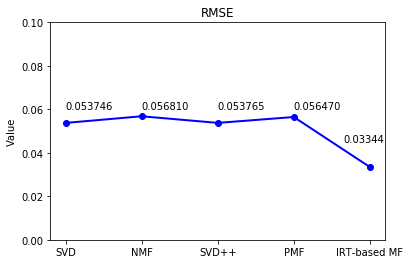

In [77]:
import numpy as np
import matplotlib.pyplot as plt
#X轴，Y轴数据
x = ['SVD','NMF','SVD++','PMF','IRT-based MF']
y = [0.05374674,0.05681071,0.05376519,0.05647,0.0334453]
plt.figure(figsize=(6,4)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2,marker='o')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.ylabel("Value")  #Y轴标签
plt.ylim(0, 0.1)
plt.title("RMSE") #图标题
plt.xticks([index for index in x], x)
plt.text(0,0.06,'0.053746')
plt.text(1,0.06,'0.056810')
plt.text(2,0.06,'0.053765')
plt.text(3,0.06,'0.056470')
plt.text(3.65,0.045,'0.03344')
plt.show()  #显示图
#plt.savefig("line.jpg") #保存图

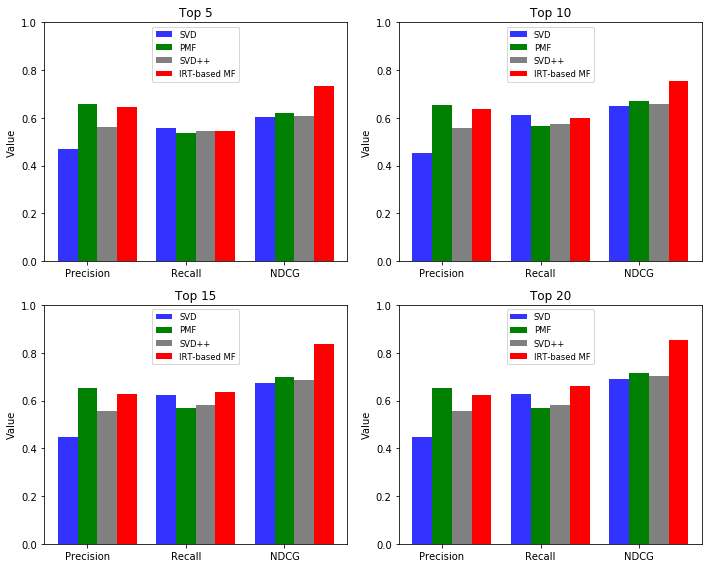

In [4]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(10,8))
for i in range(4): 
    if i==0:
        plt.subplot(2,2,i+1)#2行2列
        label_list = ['Precision', 'Recall', 'NDCG']    # 横坐标刻度显示值
        num_list1 = [0.47032433, 0.55948026, 0.60567746]      # SVD
        num_list2 = [0.65832681, 0.5388143, 0.62009335]      # NMF
        num_list3 = [0.56313299, 0.54730112, 0.60876195]      # SVD++
        num_list4 = [0.64534554, 0.54452437, 0.73450164]      # IRT-MF
        x = range(len(num_list1))

        rects1 = plt.bar(left=range(len(num_list1)), height=num_list1, width=0.2, alpha=0.8, color='blue', label="SVD")
        rects2 = plt.bar(left=[i + 0.2 for i in x], height=num_list2, width=0.2, color='green', label="PMF")
        rects3 = plt.bar(left=[i + 0.4 for i in x], height=num_list3, width=0.2, color='gray', label="SVD++")
        rects4 = plt.bar(left=[i + 0.6 for i in x], height=num_list4, width=0.2, color='red', label="IRT-based MF")
        plt.ylim(0, 1)     # y轴取值范围
        plt.ylabel("Value")
        plt.xticks([index + 0.2 for index in x], label_list)
        #plt.xlabel("k=5")
        plt.title("Top 5")
        plt.legend(loc='upper center',fontsize='small')
    if i==1:
        plt.subplot(2,2,i+1)#2行2列
        label_list = ['Precision', 'Recall', 'NDCG']    # 横坐标刻度显示值
        num_list1 = [0.45253877, 0.61115407, 0.65185113]      # SVD
        num_list2 = [0.65355756, 0.56750849, 0.67294798]      # NMF
        num_list3 = [0.55688661, 0.57658179, 0.65915632]      # SVD++
        num_list4 = [0.63577434, 0.59990276, 0.75442357]      # IRT-MF
        x = range(len(num_list1))

        rects1 = plt.bar(left=range(len(num_list1)), height=num_list1, width=0.2, alpha=0.8, color='blue', label="SVD")
        rects2 = plt.bar(left=[i + 0.2 for i in x], height=num_list2, width=0.2, color='green', label="PMF")
        rects3 = plt.bar(left=[i + 0.4 for i in x], height=num_list3, width=0.2, color='gray', label="SVD++")
        rects4 = plt.bar(left=[i + 0.6 for i in x], height=num_list4, width=0.2, color='red', label="IRT-based MF")
        plt.ylim(0, 1)     # y轴取值范围
        plt.ylabel("Value")
        plt.xticks([index + 0.2 for index in x], label_list)
        #plt.xlabel("k=5")
        plt.title("Top 10")
        plt.legend(loc='upper center',fontsize='small')
    if i==2:
        plt.subplot(2,2,i+1)#2行2列
        label_list = ['Precision', 'Recall', 'NDCG']    # 横坐标刻度显示值
        num_list1 = [0.4487284, 0.62349864, 0.6751525]      # SVD
        num_list2 = [0.6524597, 0.56908273, 0.69850724]      # NMF
        num_list3 = [0.55609458, 0.58103371, 0.68567681]      # SVD++
        num_list4 = [0.62920554, 0.63537925,0.83470233]      # IRT-MF
        x = range(len(num_list1))

        rects1 = plt.bar(left=range(len(num_list1)), height=num_list1, width=0.2, alpha=0.8, color='blue', label="SVD")
        rects2 = plt.bar(left=[i + 0.2 for i in x], height=num_list2, width=0.2, color='green', label="PMF")
        rects3 = plt.bar(left=[i + 0.4 for i in x], height=num_list3, width=0.2, color='gray', label="SVD++")
        rects4 = plt.bar(left=[i + 0.6 for i in x], height=num_list4, width=0.2, color='red', label="IRT-based MF")
        plt.ylim(0, 1)     # y轴取值范围
        plt.ylabel("Value")
        plt.xticks([index + 0.2 for index in x], label_list)
        #plt.xlabel("k=5")
        plt.title("Top 15")
        plt.legend(loc='upper center',fontsize='small')
    if i==3:
        plt.subplot(2,2,i+1)#2行2列
        label_list = ['Precision', 'Recall', 'NDCG']    # 横坐标刻度显示值
        num_list1 = [0.44774307, 0.62557144, 0.69191594]      # SVD
        num_list2 = [0.65239916, 0.56912735, 0.71548763]      # NMF
        num_list3 = [0.55588295, 0.58156019, 0.70300885]      # SVD++
        num_list4 = [0.62379936, 0.66120616, 0.85491894]      # IRT-MF
        x = range(len(num_list1))

        rects1 = plt.bar(left=range(len(num_list1)), height=num_list1, width=0.2, alpha=0.8, color='blue', label="SVD")
        rects2 = plt.bar(left=[i + 0.2 for i in x], height=num_list2, width=0.2, color='green', label="PMF")
        rects3 = plt.bar(left=[i + 0.4 for i in x], height=num_list3, width=0.2, color='gray', label="SVD++")
        rects4 = plt.bar(left=[i + 0.6 for i in x], height=num_list4, width=0.2, color='red', label="IRT-based MF")
        plt.ylim(0, 1)     # y轴取值范围
        plt.ylabel("Value")
        plt.xticks([index + 0.2 for index in x], label_list)
        #plt.xlabel("k=5")
        plt.title("Top 20")
        plt.legend(loc='upper center',fontsize='small')
plt.tight_layout()
#plt.figure()
plt.show()

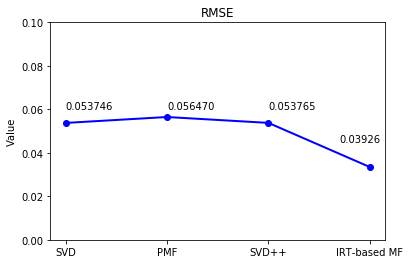

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#X轴，Y轴数据
x = ['SVD','PMF','SVD++','IRT-based MF']
y = [0.05374674,0.05647,0.05376519,0.0334453]
plt.figure(figsize=(6,4)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2,marker='o')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.ylabel("Value")  #Y轴标签
plt.ylim(0, 0.1)
plt.title("RMSE") #图标题
plt.xticks([index for index in x], x)
plt.text(0,0.06,'0.053746')
plt.text(1,0.06,'0.056470')
plt.text(2,0.06,'0.053765')
plt.text(2.70,0.045,'0.03926')
plt.show()  #显示图
#plt.savefig("line.jpg") #保存图

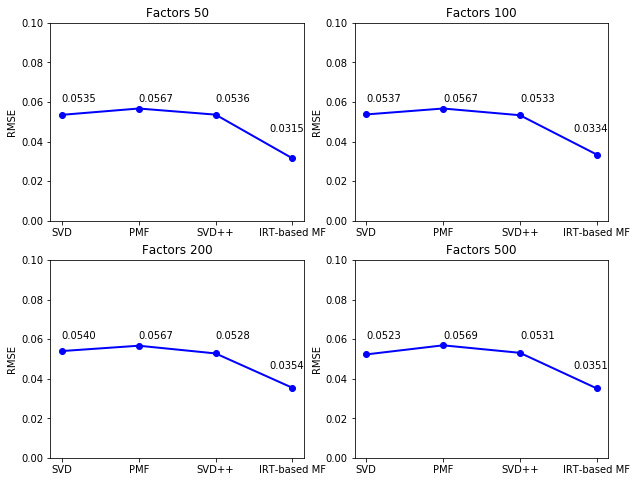

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
for i in range(4): 
    if i==0:
        plt.subplot(2,2,i+1)#2行2列
        x = ['SVD','PMF','SVD++','IRT-based MF']
        y = [0.0535,0.0567,0.0536,0.0315]
        plt.plot(x,y,"b",linewidth=2,marker='o')  
        plt.xticks([index for index in x], x)
        plt.text(0,0.06,'0.0535')
        plt.text(1,0.06,'0.0567')
        plt.text(2,0.06,'0.0536')
        plt.text(2.70,0.045,'0.0315')
        plt.ylim(0, 0.1)
        plt.ylabel("RMSE")
        plt.title("Factors 50") #图标题
    if i==1:
        plt.subplot(2,2,i+1)#2行2列
        x = ['SVD','PMF','SVD++','IRT-based MF']
        y = [0.0537,0.0567,0.0533,0.0334]
        plt.plot(x,y,"b",linewidth=2,marker='o') 
        plt.xticks([index for index in x], x)
        plt.text(0,0.06,'0.0537')
        plt.text(1,0.06,'0.0567')
        plt.text(2,0.06,'0.0533')
        plt.text(2.70,0.045,'0.0334')
        plt.ylim(0, 0.1)
        plt.ylabel("RMSE")
        plt.title("Factors 100") #图标题
    if i==2:
        plt.subplot(2,2,i+1)#2行2列
        x = ['SVD','PMF','SVD++','IRT-based MF']
        y = [0.0540,0.0567,0.0528,0.0354]
        plt.plot(x,y,"b",linewidth=2,marker='o')
        plt.xticks([index for index in x], x)
        plt.text(0,0.06,'0.0540')
        plt.text(1,0.06,'0.0567')
        plt.text(2,0.06,'0.0528')
        plt.text(2.70,0.045,'0.0354')
        plt.ylim(0, 0.1)
        plt.ylabel("RMSE")
        plt.title("Factors 200") #图标题
    if i==3:
        plt.subplot(2,2,i+1)#2行2列
        x = ['SVD','PMF','SVD++','IRT-based MF']
        y = [0.0523,0.0569,0.0531,0.0351]
        plt.plot(x,y,"b",linewidth=2,marker='o')
        plt.xticks([index for index in x], x)
        plt.text(0,0.06,'0.0523')
        plt.text(1,0.06,'0.0569')
        plt.text(2,0.06,'0.0531')
        plt.text(2.70,0.045,'0.0351')
        plt.ylim(0, 0.1)
        plt.ylabel("RMSE")
        plt.title("Factors 500") #图标题

In [17]:
import numpy as np
import pandas as pd
import random
#Loading the dataset and Excluding the outliers
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
kbdata = kbdata.loc[(kbdata['num']<200)]#seven months, one per day
#num_max=kbdata['num'].max()
#num_min=kbdata['num'].min()
#kbdata['num']=kbdata['num'].apply(lambda x: (x-num_min+1)*1.0/(num_max-num_min+1))
trainset = kbdata[['csr','ke','num']]
trainset.to_csv('/data/fjsdata/ctKngBase/kbcc_trainset.csv', index=False, sep='|')
print ('Trainset shape is:%d rows and %d columns'%(trainset.shape[0],trainset.shape[1]))
#generating the testset: u,i,r, including negtive items.
list_ke = np.array(trainset['ke']).tolist() #get all items
list_ke =  list(set(list_ke)) #drop duplicate
list_csr = np.array(trainset['csr']).tolist()
list_csr = list(set(list_csr))
print('Dataset Statistics: Interaction = %d, User = %d, Item = %d, Sparsity = %.4f' % 
      (trainset.shape[0], len(list_csr), len(list_ke),trainset.shape[0]/(len(list_csr)*len(list_ke)) ))
testset = []
for csr in list_csr:
    csr_pos = trainset[trainset['csr']==csr]
    pos = random.sample(np.array(csr_pos).tolist(),1)[0]
    testset.append(pos)#random get a positive item
    n = 0
    flag = True
    while flag==True:
        ke = random.sample(list_ke,1)[0]#random get a negtive item 
        if ke not in np.array(csr_pos['ke']).tolist():#negtive items
            testset.append([csr,ke,0.0])
            n=n+1
            if n==99: flag=False
        #else:#postive items
        #    ke_pos = csr_pos[csr_pos['ke']==ke]
        #    ke_pos = np.array(ke_pos).tolist()[0]
        #    num = ke_pos[2]
        #    testset.append([csr,ke,num])
testset=pd.DataFrame(testset, columns=['csr', 'ke','num'])#list转换成 dataframe
testset.to_csv('/data/fjsdata/ctKngBase/kbcc_testset.csv', index=False, sep='|')
print ('Testset shape is:%d rows and %d columns'%(testset.shape[0],testset.shape[1]))

Trainset shape is:2547452 rows and 3 columns
Dataset Statistics: Interaction = 2547452, User = 10216, Item = 96323, Sparsity = 0.0026
Testset shape is:1021600 rows and 3 columns


In [19]:
#print (testset[testset ['csr']==88])
#print (trainset[trainset ['csr']==88])
#kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kbcc_testset.csv", sep='|', low_memory=False, dtype={'csr':int, 'ke':int, 'num':float})
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kbcc_trainset.csv", sep='|', low_memory=False, dtype={'csr':int, 'ke':int, 'num':float})
print(kbdata.head())

    csr     ke  num
0  2986  42211  1.0
1  2986  28115  2.0
2  2986  29249  8.0
3  2986  75667  1.0
4  2986  74903  1.0


In [4]:
import numpy as np
import pandas as pd
import random
#Loading the dataset and Excluding the outliers
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
kbdata = kbdata.loc[(kbdata['num']<11)]#seven months, one per day
trainset = kbdata[['csr','ke','num']]
trainset.to_csv('/data/fjsdata/BMF/kbcc_trainset.csv', index=False, sep='|')
print ('Trainset shape is:%d rows and %d columns'%(trainset.shape[0],trainset.shape[1]))
#generating the testset: u,i,r, including negtive items.
list_ke = np.array(trainset['ke']).tolist() #get all items
list_ke =  list(set(list_ke)) #drop duplicate
list_csr = np.array(trainset['csr']).tolist()
list_csr = list(set(list_csr))
print('Dataset Statistics: Interaction = %d, User = %d, Item = %d, Sparsity = %.4f' % 
      (trainset.shape[0], len(list_csr), len(list_ke),trainset.shape[0]/(len(list_csr)*len(list_ke)) ))
testset = []
for csr in list_csr:
    csr_pos = trainset[trainset['csr']==csr]
    testset.append(np.array(csr_pos).tolist()[-1])#get the last as test

testset=pd.DataFrame(testset, columns=['csr', 'ke','num'])#list转换成 dataframe
testset.to_csv('/data/fjsdata/BMF/kbcc_testset.csv', index=False, sep='|')
print ('Testset shape is:%d rows and %d columns'%(testset.shape[0],testset.shape[1]))

Trainset shape is:2323398 rows and 3 columns
Dataset Statistics: Interaction = 2323398, User = 10209, Item = 96310, Sparsity = 0.0024
Testset shape is:10209 rows and 3 columns


In [2]:
import numpy as np
import pandas as pd

filePath = "/data/fjsdata/BMF/ml-1m.train.rating" 
data = pd.read_csv(filePath, sep='\t', header=None, names=['user', 'item', 'rating'], \
                                usecols=[0, 1, 2], dtype={0: np.int32, 1: np.int32, 2: np.float})
maxu, maxi, maxr = data['user'].max()+1, data['item'].max()+1, data['rating'].max()
print('Dataset Statistics: Interaction = %d, User = %d, Item = %d, Sparsity = %.4f' % \
                  (data.shape[0], maxu, maxi, data.shape[0]/(maxu*maxi)))
rs = pd.DataFrame([data.mean(), data.std(), data.var()], index=['Mean', 'Std. dev', 'Variance'])
print (rs)

Dataset Statistics: Interaction = 994169, User = 6040, Item = 3706, Sparsity = 0.0444
                  user           item    rating
Mean      3.023537e+03     872.860828  3.581378
Std. dev  1.728320e+03     738.213243  1.116791
Variance  2.987090e+06  544958.792605  1.247222


In [4]:
import numpy as np
import pandas as pd

filePath = "/data/fjsdata/BMF/kbcc_trainset.csv" 
data = pd.read_csv(filePath, sep='|', low_memory=False, dtype={'csr':int, 'ke':int, 'num':float})
maxu, maxi, maxr = data['csr'].max()+1, data['ke'].max()+1, data['num'].max()
print('Dataset Statistics: Interaction = %d, User = %d, Item = %d, Sparsity = %.4f' % \
                  (data.shape[0], maxu, maxi, data.shape[0]/(maxu*maxi)))
rs = pd.DataFrame([data.mean(), data.std(), data.var()], index=['Mean', 'Std. dev', 'Variance'])
print (rs)

Dataset Statistics: Interaction = 2323398, User = 10216, Item = 96324, Sparsity = 0.0024
                   csr            ke       num
Mean      4.789905e+03  5.251797e+04  2.204067
Std. dev  2.658883e+03  2.590950e+04  1.959049
Variance  7.069656e+06  6.713022e+08  3.837873


In [5]:
import numpy as np
import pandas as pd
import random
#Loading the dataset and Excluding the outliers
kbdata = pd.read_csv("/data/fjsdata/ctKngBase/kb.csv", sep='|', low_memory=False)
kbdata = kbdata.loc[(kbdata['num']<11)]#seven months, one per day
kbdata = kbdata[['csr','ke','num']]
print (kbdata['csr'].max())
print (kbdata['ke'].max())
#generating the testset: u,i,r, including negtive items.
list_csr = np.array(kbdata['csr']).tolist()#get all users
list_csr = list(set(list_csr))#drop duplicate
testset = []
trainset = []
for csr in list_csr:
    csr_pos = kbdata[kbdata['csr']==csr]
    testset.append(np.array(csr_pos).tolist()[-1])#get the last as test
    trainset.extend(np.array(csr_pos).tolist()[:-1])#del the last 
    
trainset=pd.DataFrame(trainset, columns=['csr', 'ke','num'])#list转换成 dataframe
trainset.to_csv('/data/fjsdata/BMF/kbcc_trainset.csv', index=False, sep='|')
print ('Trainset shape is:%d rows and %d columns'%(trainset.shape[0],trainset.shape[1]))
print (trainset['csr'].max())
print (trainset['ke'].max())
testset=pd.DataFrame(testset, columns=['csr', 'ke','num'])#list转换成 dataframe
testset.to_csv('/data/fjsdata/BMF/kbcc_testset.csv', index=False, sep='|')
print ('Testset shape is:%d rows and %d columns'%(testset.shape[0],testset.shape[1]))

10215
96323
Trainset shape is:2313189 rows and 3 columns
10215
96323
Testset shape is:10209 rows and 3 columns
